In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
! cp -r /kaggle/input/erav1-s18-vae/VAE/ /kaggle/working/

In [ ]:
! cd /kaggle/working/VAE

In [4]:
from src.models import VAE, MNIST_Encoder, MNIST_Decoder
import pytorch_lightning as pl

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
import torch
encoder = MNIST_Encoder()
decoder = MNIST_Decoder()
model = VAE(encoder, decoder, enc_out_dim=10, latent_dim=10, lamda_label_loss=100)
model.decoder_classifier.load_state_dict(torch.load('store/mnist_decoder_classifier.pt', map_location=torch.device("cuda") ))

<All keys matched successfully>

In [7]:
model

VAE(
  (encoder): MNIST_Encoder(
    (conv1): Sequential(
      (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
      (1): ReLU()
      (2): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
      (4): ReLU()
      (5): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): Conv2d(10, 11, kernel_size=(3, 3), stride=(1, 1))
      (7): ReLU()
      (8): BatchNorm2d(11, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (conv2): Sequential(
      (0): Conv2d(11, 10, kernel_size=(1, 1), stride=(1, 1))
      (1): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
      (2): ReLU()
      (3): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (4): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
      (5): ReLU()
      (6): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
 

In [8]:
from src.datasets import MNISTDataModule
mnist_dm = MNISTDataModule()

In [9]:
pl.seed_everything(1234)

trainer = pl.Trainer( max_epochs=30, callbacks=[pl.callbacks.TQDMProgressBar(refresh_rate=20)])

In [10]:
from pytorch_lightning.tuner import Tuner

tuner = Tuner(trainer=trainer)

# Run learning rate finder
lr_finder = tuner.lr_find(model,datamodule=mnist_dm, min_lr=1e-6, max_lr=1e-1, num_training=1000)

/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/configuration_validator.py:69: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
  rank_zero_warn("You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.")


100%|██████████| 9912422/9912422 [00:00<00:00, 166820656.29it/s]


Extracting ../../data/MNIST/raw/train-images-idx3-ubyte.gz to ../../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 70142266.26it/s]

Extracting ../../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../../data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 42151050.12it/s]


Extracting ../../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12845939.83it/s]


Extracting ../../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/MNIST/raw



Finding best initial lr:   0%|          | 0/1000 [00:00<?, ?it/s]

new_lr=0.00019498445997580459


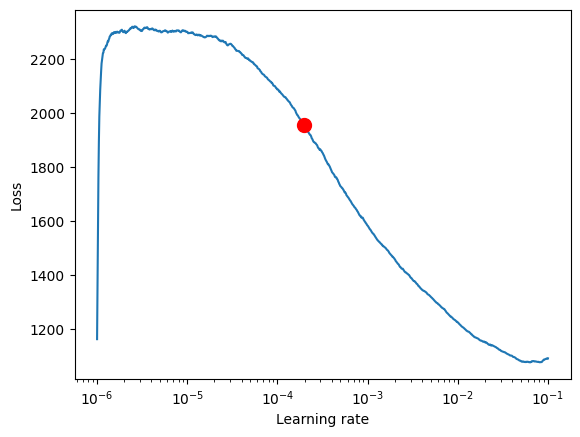

In [11]:
# Plot with
fig = lr_finder.plot(suggest=True)
fig.show()

# Pick point based on plot, or get suggestion
new_lr = lr_finder.suggestion()
print(f"{new_lr=}")

In [12]:
model.best_lr = 5e-4

In [13]:
trainer.fit(model, mnist_dm)

Training: 0it [00:00, ?it/s]

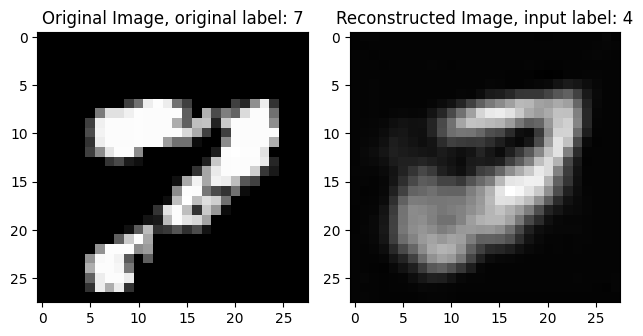

In [14]:
model.plot_singe_test_mnist(5, 4)

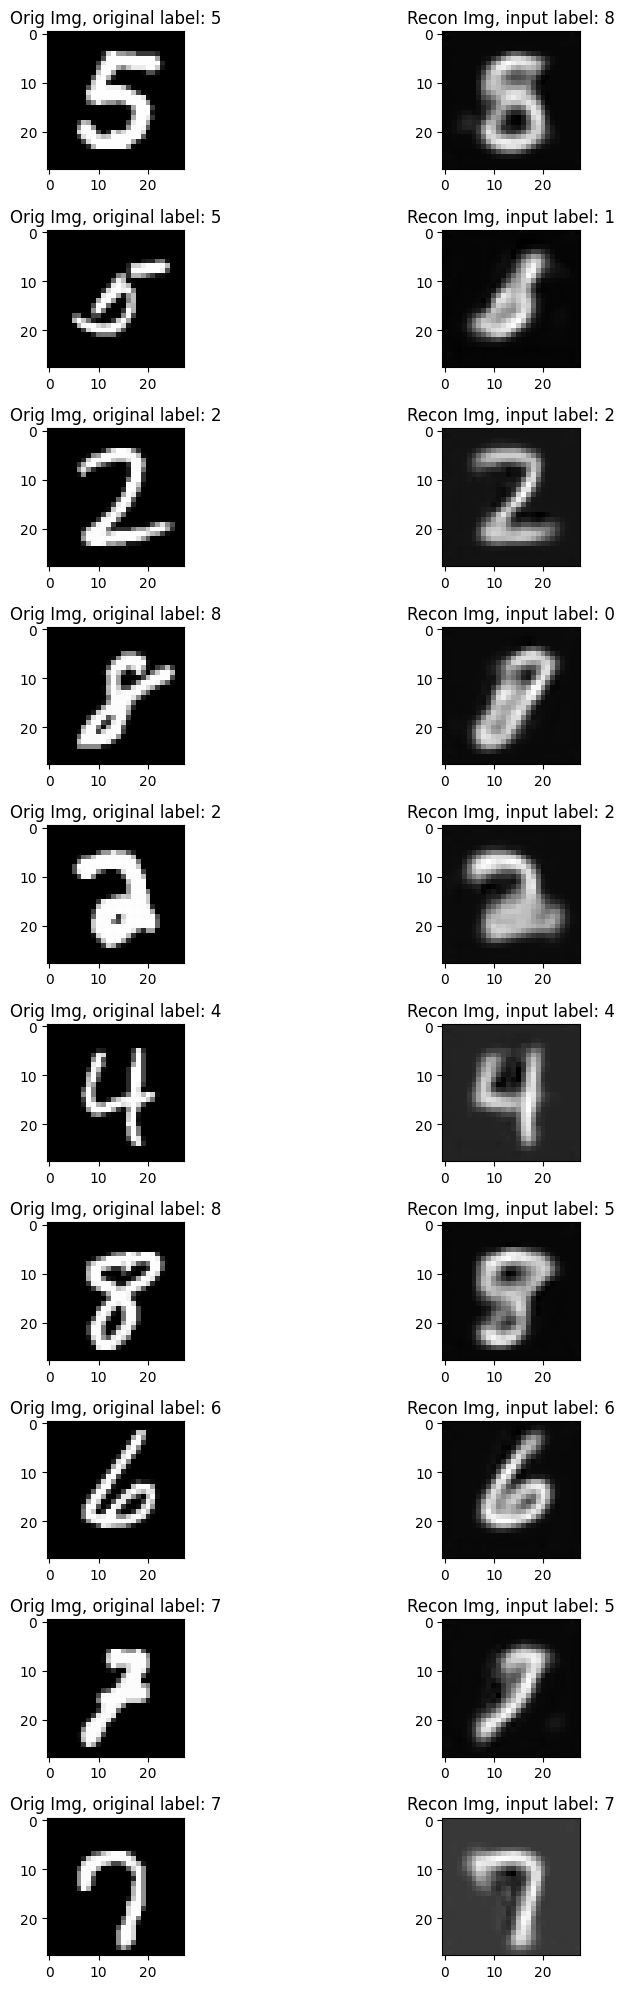

In [16]:
model.plot_test_mnist(10, random_label_prob=0.5)

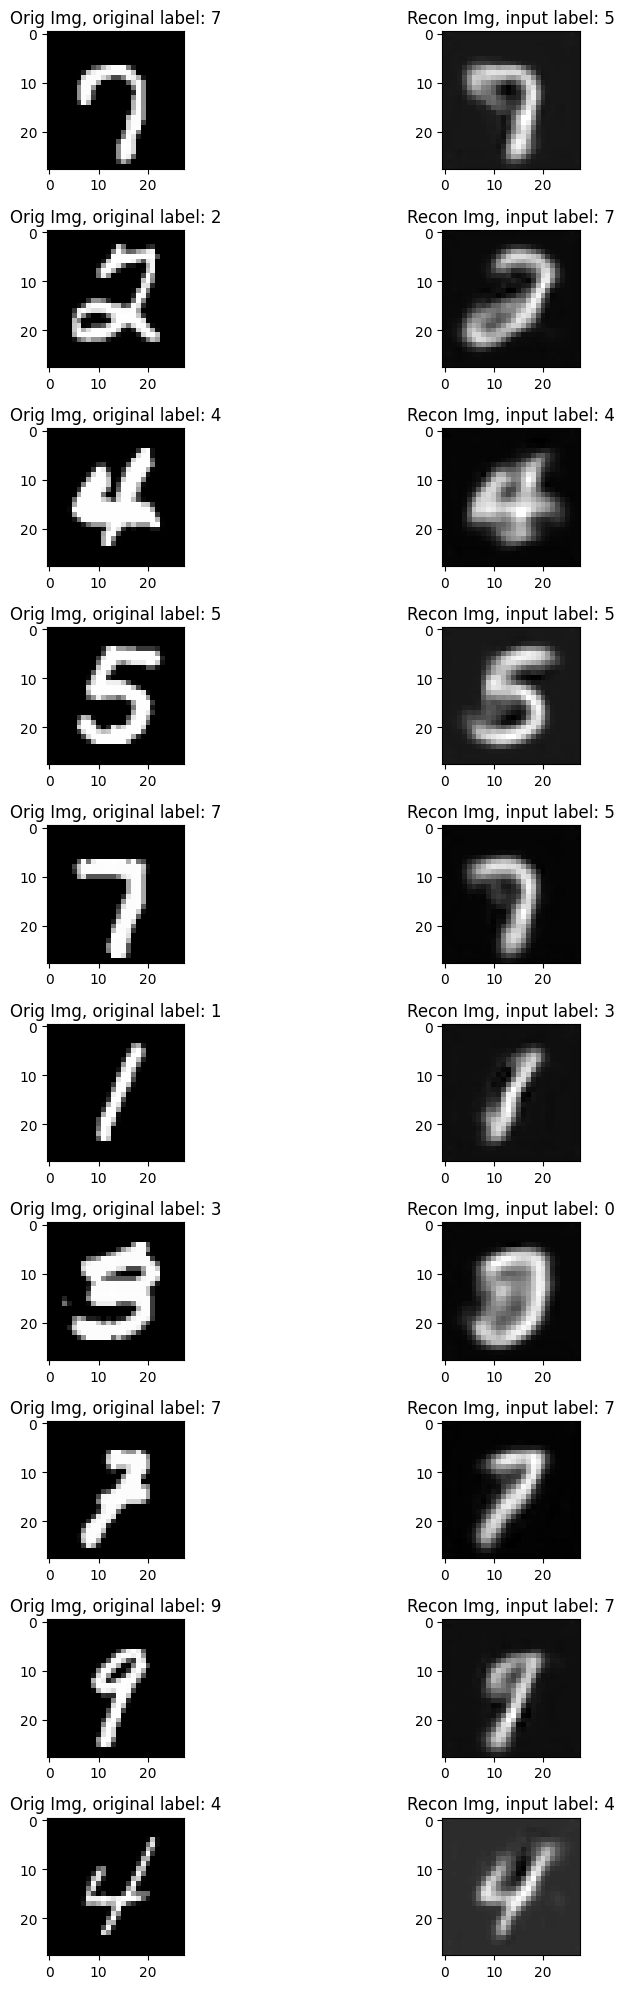

In [24]:
model.plot_test_mnist(10, random_label_prob=0.6)

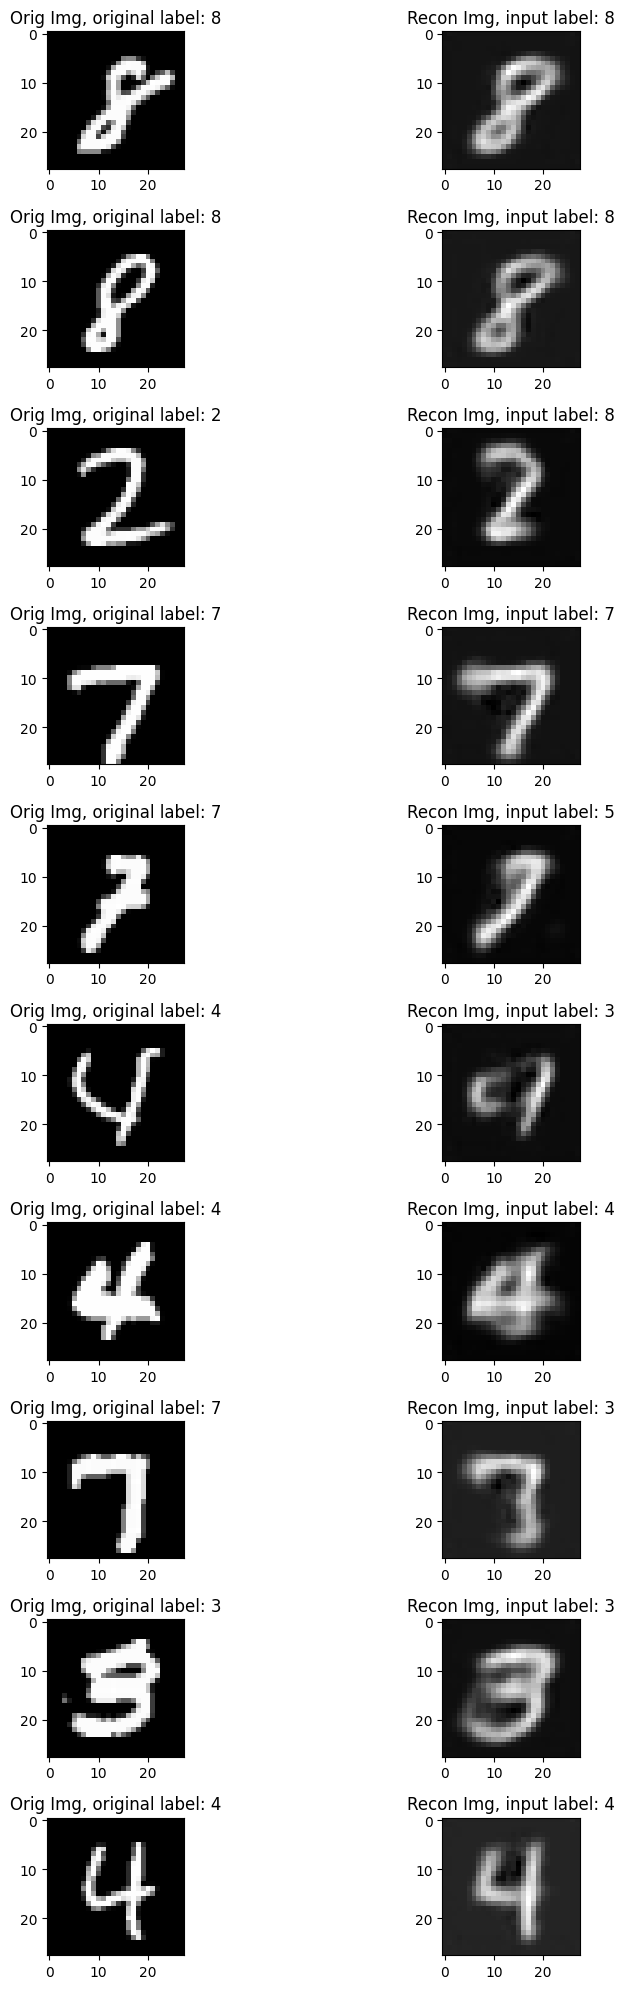

In [19]:
model.plot_test_mnist(10, random_label_prob=0.5)